In [246]:
# Setup and Dependencies
import hvplot.pandas
import geoviews as gv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

# Gather and assemble data
health_center_path = 'Public_Health_Services-_Chicago_Primary_Care_Community_Health_Centers_20231023.csv'
income_data_path = 'Income_by_neighborhood.csv'

health_center_data = pd.read_csv(health_center_path)
income_data = pd.read_csv(income_data_path)
health_center_data

,Facility,Community Area (#),Phone,"FQHC, Look-alike, or Neither; Special Notes",Address
0,Mercy Family Health Center @ Oakwood Shores,OAKLAND (36),(773) 451-0460,Look-alike,3753 S. Cottage Grove60653\n(41.82672248000045...
1,ACCESS Southwest Family Health Center,GARFIELD RIDGE (56),(866) 882-2237,FQHC,"4839 W. 47th Street60638\n(41.80757461200045, ..."
2,Heartland Health Outreach- Refugee Health,UPTOWN (3),(773) 751-1744,FQHC; specialize in refugee health,"4750 N Sheridan Rd60640\n(41.96843068300046, -..."
3,Heartland Health Center- Hibbard Elementary Sc...,ALBANY PARK (14),(773) 336-6100,FQHC; School-based health center (open to comm...,4930 North Sawyer Avenue60625\n(41.97084703000...
4,Near North - Winfield Moody Health Center,NEAR NORTH SIDE (8),(312) 337-1073,FQHC,"1276 N. Clybourn60610\n(41.90535451700049, -87..."
...,...,...,...,...,...
115,Mercy Family Health Center @ Mercy Hospital,NEAR SOUTH SIDE (33),(312) 567-2000,Look-alike,"2525 S. Michigan60616\n(41.846811956000465, -8..."
116,ACCESS Cabrini Family Health Center,MCKINLEY PARK (59),(866) 882-2237,FQHC,"3450 S. Archer Ave.60608\n(41.8312221810005, -..."
117,Alivio Medical Center -Little Village Lawndale...,SOUTH LAWNDALE (30),(773) 254-1400,FQHC,"3120 S Kostner Ave60623\n(41.83605293800048, -..."
118,UIC - Mile Square - Englewood,ENGLEWOOD (68),(312) 996-2000,FQHC,"641 W. 63rd Street60621\n(41.77979320600048, -..."


In [240]:
# Clean up health center dataframe
health_center_data[['Community Area', 'Community Area Number']] = health_center_data['Community Area (#)'].str.split("(", expand = True)

for i in range(len(health_center_data['Community Area Number'])):
    health_center_data['Community Area Number'][i] = health_center_data['Community Area Number'][i][:len(health_center_data['Community Area Number'][i])-1]
    
for i in range(len(health_center_data['Community Area'])):
    health_center_data['Community Area'][i] = health_center_data['Community Area'][i][:len(health_center_data['Community Area'][i])-1]
    
new_health_center_data = health_center_data.drop(columns = ['Community Area (#)', 'Phone', 'FQHC, Look-alike, or Neither; Special Notes'])

In [241]:
# Prepare income dataframe
income_data.columns = ['Community Area', 'Median Household Income (USD)']

income_data['Community Area'] = income_data['Community Area'].str.upper()

income = income_data

income['Median Household Income (USD)'] = income_data['Median Household Income (USD)'].str.replace('$', '').str.replace(',', '').astype('float')
income

,Community Area,Median Household Income (USD)
0,ALBANY PARK,40711.0
1,ARCHER HEIGHTS,39431.0
2,ARMOUR SQUARE,22756.0
3,ASHBURN,53633.0
4,AUBURN GRESHAM,34238.0
...,...,...
68,WASHINGTON PARK,15160.0
69,WEST ELSDON,45310.0
70,WEST ENGLEWOOD,26693.0
71,WEST GARFIELD PARK,23121.0


In [242]:
# Create dataframe for number of public health centers in each community area
com_area_list = income['Community Area']
all_areas = new_health_center_data['Community Area']
num_health_centers = [0] * len(com_area_list)

for i in range(len(com_area_list)):
    for j in range(len(all_areas)):
        if all_areas[j] == com_area_list[i]:
            num_health_centers[i] += 1
            j += 1
            
area_num_data = [[list(zip(com_area_list, num_health_centers))]]
area_num = pd.DataFrame(list(zip(com_area_list, num_health_centers)), columns = ['Community Area', 
                                                                                 'Number of Health Centers'])
area_num

,Community Area,Number of Health Centers
0,ALBANY PARK,2
1,ARCHER HEIGHTS,1
2,ARMOUR SQUARE,0
3,ASHBURN,0
4,AUBURN GRESHAM,2
...,...,...
68,WASHINGTON PARK,1
69,WEST ELSDON,1
70,WEST ENGLEWOOD,0
71,WEST GARFIELD PARK,1


In [243]:
# Merge dataframes
nid = pd.merge(income, area_num, how = 'left', on = ['Community Area'])
new_income_data = nid.sort_values(by = ['Median Household Income (USD)'])

In [244]:
new_income_data

,Community Area,Median Household Income (USD),Number of Health Centers
55,OAKLAND,10739.0,2
59,RIVERDALE,13178.0,1
28,GRAND BOULEVARD,14178.0,3
68,WASHINGTON PARK,15160.0,1
52,NORTH LAWNDALE,18342.0,5
...,...,...,...
47,NEAR NORTH SIDE,57811.0,2
41,LOOP,65128.0,0
9,BEVERLY,66823.0,0
24,FOREST GLEN,68269.0,0


The r-value is: -0.38378044421926105


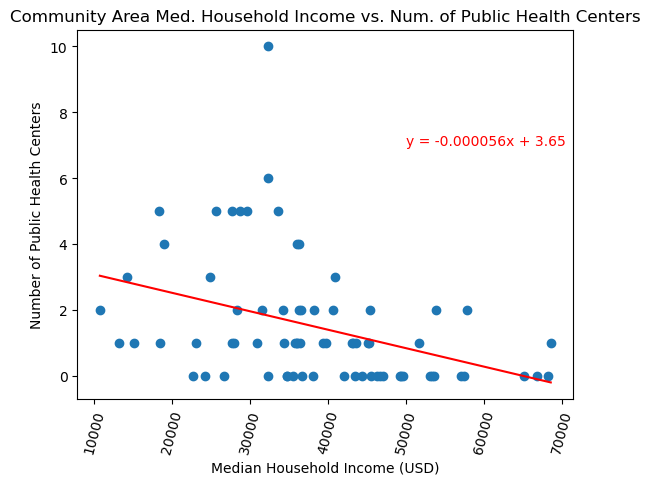

In [248]:
# Plot income vs. number of community centers
plt.scatter(new_income_data['Median Household Income (USD)'], new_income_data['Number of Health Centers'])

# Add scatterplot features
plt.title('Community Area Med. Household Income vs. Num. of Public Health Centers')
plt.xlabel('Median Household Income (USD)')
plt.ylabel('Number of Public Health Centers')
plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], rotation = 75)

#Add regression line
x = new_income_data['Median Household Income (USD)']
y = new_income_data['Number of Health Centers']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.6f}x + {intercept:.2f}', xy = (50000, 7), color = 'red')
print(f'The r-value is: {rvalue}')

# Save the figure
plt.savefig("MedIncVsPHC.png")

# Print plot
plt.show()

In [247]:
commAreas = 'CommAreas.csv'